In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import pandas as pd

<div style="border-bottom: 3px solid black;"></div>

### Task 2 &mdash; Drug Classification

2. Load the dataset in Python (you can use pandas.read csv)

In [2]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


3. Plot the distribution of the instances in each class and store the graphic in a file called drug-distribution.pdf.
You can use matplotlib.pyplot. This pre-analysis will allow you to determine if the classes are balanced,
and which metric is more appropriate to use to evaluate the performance of your classifier.

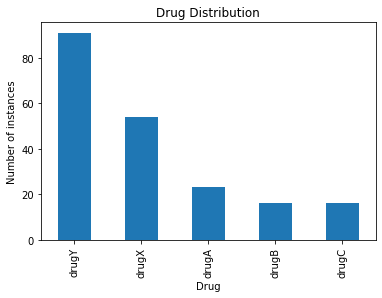

In [3]:
# data = df.to_numpy()
# classes = np.unique(data[:,-1])
# nb_drugs_per_class = [np.count_nonzero(data[:,-1] == drug) for drug in classes]
num_drugs_per_class = df.Drug.value_counts().to_frame()
drug_distribution = num_drugs_per_class.plot(kind="bar", title='Drug Distribution', legend=False)
drug_distribution.set_xlabel("Drug")
drug_distribution.set_ylabel("Number of instances")
plt.show()
drug_distribution.figure.savefig("drug-distribution.pdf")

#Plot
# plt.xticks(range(len(num_drugs_per_class)), classes)
# plt.xlabel('Drug')
# plt.ylabel('Number of instances')
# plt.title('Distribution of Drugs')
# plt.bar(range(len(num_drugs_per_class)), num_drugs_per_class)
# plt.show()
# plt.savefig("drug-distribution.pdf")

4. Convert all ordinal and nominal features in numerical format. Make sure that your converted format
respects the ordering of ordinal features, and does not introduce any ordering for nominal features. You
may want to take a look at pandas.get dummies and pandas.Categorical to do this.

In [4]:
ordinals = ['LOW', 'NORMAL', 'HIGH']
y = df.pop("Drug")
df.BP = pd.Categorical(df.BP, categories=ordinals, ordered=True).codes
df.Cholesterol= pd.Categorical(df.Cholesterol, categories=ordinals, ordered=True).codes
df = pd.get_dummies(df)

5. Split the dataset using train test split using the default parameter values.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df, y)

6. Run 6 different classifiers: